In [1]:
import numpy as np
import h5py
from os.path import join # to use "join" for namespaces

/home/vyo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File('../testdir_h5/pdp3_result/data.h5', 'r')

In [3]:
base_keyspace = '/pdp3/result'
E_r_keyspace = 'E_r'
E_z_keyspace = 'E_z'
J_z_keyspace = 'J_z'
J_r_keyspace = 'J_r'
J_phi_keyspace = 'J_phi'
rho_beam_keyspace = 'rho_beam'

In [4]:
for i in f[join(base_keyspace, E_r_keyspace)].keys():
    print(i)

0
1
2
3
4


In [5]:
def get_frame(file, space, number):
    file_path = join(base_keyspace, space, str(number))
    frame = file[file_path][:]
    return frame

In [7]:
get_frame(f, E_r_keyspace, 4)

array([[-1.26701970e-14, -4.09586534e-14, -7.97563249e-14, ...,
         1.25903279e-12,  1.32998006e-12,  1.29941977e-12],
       [-9.06697525e+02, -3.02012029e+03, -1.87398928e+02, ...,
        -3.58049910e+03,  2.94370147e+03,  8.73958830e+02],
       [ 1.55968134e+03,  4.90064239e+03,  2.57225614e+02, ...,
        -3.83781194e+03,  5.84016810e+03, -2.32778322e+03],
       ...,
       [-1.57324831e+03, -2.37429433e+03,  4.15849683e+03, ...,
        -3.92044206e+03,  4.42968726e+02,  8.44772078e+02],
       [ 7.65892189e+01,  2.64446332e+02, -9.17587159e+02, ...,
        -1.06121300e+01,  1.86271610e+03,  1.23317288e+03],
       [ 4.04237168e+02,  1.61898433e+03, -4.99162359e+03, ...,
         1.91978130e+03,  2.68940050e+02,  2.95229591e+02]])

In [8]:
def get_row(file, space, number, row_number):
    file_path = join(base_keyspace, space, str(number))
    row = file[file_path][row_number]
    return(row)

In [9]:
def get_col(file, space, number, col_number):
    file_path = join(base_keyspace, space, str(number))
    col = file[file_path][:,col_number]
    return(col)

In [10]:
class H5Reader:
    def __init__(self, h5_path, base_keyspace='/pdp3/result', dump_keyspace='/pdp3/dump'):
        self.file = h5py.File(h5_path)
        self.__base_keyspace = base_keyspace
        self.__dump_keyspace = dump_keyspace
        

    def __get_path__(self, space, ds=''):
        path = join(self.__base_keyspace, space, str(ds))
        return(path)
        
        
    def __check_frame__(self, space, frame):
        if frame < 0:
            raise Exception('frame should not be less, than 0. The value was: {}'.format(frame))
        else:
            path = self.__get_path__(space)
            space_length = len(self.file[path])
            if space_length < frame:
                raise Exception('frame should be less, than {}. The value was: {}'.format(space_length, frame))
            else:
                return(True)


    def __check_row__(self, space, row):
        if row < 0:
            raise Exception('row should not be less than 0. The value was {}'.format(row))
        else:
            path = self.__get_path__(space, 0)
            frame_length = len(self.file[path])
            if frame_length < row:
                raise Exception('Out of range: row should be less, than {}. The value was {}.'.format(row, frame_length))
            else:
                return(True)
        
        
    def __check_col__(self, space, col):
        if col < 0:
            raise Exception('column should not be less than 0. The value was {}'.format(col))
        else:
            path = self.__get_path__(space, 0)
            frame_height = len(self.file[path][0])
            if frame_height < col:
                raise Exception('Out of range: column should be less, than {}. The value was {}.'.format(col, frame_height))
            else:
                return(True)
        
        
    def __check_frame_range__(self, space, from_frame, to_frame):       
        if to_frame < from_frame:
            raise Exception('from_frame should be less or equal, than to_frame. The values was: {} and {}'.format(from_frame, to_frame))
        elif from_frame < 0:
            raise Exception('from_frame should not be less, than 0. The value was: {}'.format(from_frame))
        else:
            return(self.__check_frame__(space, to_frame))
        
        
    def __check_row_range__(self, space, from_row, to_row):
        if from_row < 0:
            raise Exception('from_row should not be less than 0. The value was {}'.format(from_row))
        elif to_row < from_row:
            raise Exception('from_row should be less than to_row. The values were {} and {}'.format(from_row, to_row))
        else:
            return(self.__check_row__(space, to_row))
        
        
    def __check_col_range__(self, space, from_col, to_col):
        if from_col < 0:
            raise Exception('from_col should not be less than 0. The value was {}'.format(from_col))
        elif to_col < from_col:
            raise Exception('from_col should be less than to_col. The values were {} and {}'.format(from_col, to_col))
        else:
            return(self.__check_col__(space, to_col))

#################################################################################################
#################################################################################################
#################################################################################################
        
    def get_frame(self, space, number):
        if self.__check_frame__(space, number):
            path = self.__get_path__(space, number)
            frame = self.file[path][:]
            return frame
    
    
    def get_row(self, space, number, row_number):
        if self.__check_frame__(space, number) and self.__check_row__(space, row_number):
            path = self.__get_path__(space, number)
            row = self.file[path][:,row_number]
            return(row)
    
    
    def get_col(self, space, number, col_number):
        if self.__check_frame__(space, number) and self.__check_col__(space, col_number):
            path = self.__get_path__(space, number)
            col = self.file[path][col_number]
            return(col)
    
    
    def get_point(self, space, number, row_number, col_number):
        if self.__check_frame__(space, number) and self.__check_row__(space, row_number) and self.__check_col__(space, col_number):
            path = self.__get_path__(space, number)
            point = self.file[path][row_number][col_number]
            return(point)

        
###################################################################

    def get_frame_range(self, space, from_frame=0, to_frame=None):
        path = self.__get_path__(space, 0)
        frame_length = len(self.file[path])
        frame_height = len(self.file[path][0])

        if not to_frame:
            path = self.__get_path__(space)
            space_length = len(self.file[path])
            to_frame = space_length-1

        if self.__check_frame_range__(space, from_frame, to_frame):
            frames = np.empty([to_frame - from_frame + 1, frame_length, frame_height])
            
            for i in range(from_frame, to_frame + 1):
                path = self.__get_path__(space, i)
                frames[i-from_frame] = self.file[path][:]
            return(frames)
        
        
    def get_frame_range_row(self, space, from_frame=0, to_frame=None, row_number=0):
        path = self.__get_path__(space, 0)
        frame_length = len(self.file[path])
        frame_height = len(self.file[path][0])

        if not to_frame:
            space_length = len(self.file[path])
            to_frame = space_length-1
            
        if self.__check_frame_range__(space, from_frame, to_frame) and self.__check_row__(space, row_number):
            rows = []
            for i in range(from_frame, to_frame+1):
                path = self.__get_path__(space, i)
                rows.append(self.file[path][row_number])
            return(rows)


    def get_frame_range_col(self, space, from_frame=0, to_frame=None, col_number=0):
        if not to_frame:
            path = self.__get_path__(space, 0)
            space_length = len(self.file[path])
            to_frame = space_length-1
            
        if self.__check_frame_range__(space, from_frame, to_frame) and self.__check_col__(space, col_number):
            cols = []
            for i in range(from_frame, to_frame+1):
                path = self.__get_path__(space, i)
                cols.append(self.file[path][:,col_number])
            return(cols)


In [13]:
h5f = H5Reader('../testdir_h5/pdp3_result//data.h5')

In [14]:
a = h5f.get_frame(E_r_keyspace, 4)

In [15]:
a[:,0]

array([-1.26701970e-14, -9.06697525e+02,  1.55968134e+03, ...,
       -1.57324831e+03,  7.65892189e+01,  4.04237168e+02])

In [17]:
y_1 = h5f.get_row(E_r_keyspace, 4, 4)
y_2 = h5f.get_col(E_r_keyspace, 4, 4)

In [18]:
print(len(y_1), len(y_2))

2046 254


In [19]:
x_1 = np.linspace(0, 2045, 2046)
x_2 = np.linspace(0, 253, 254)

In [20]:
import matplotlib.pyplot as plt

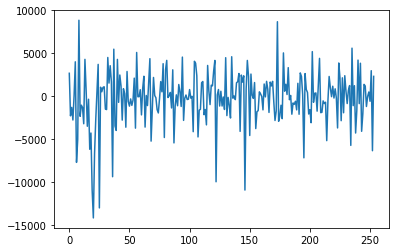

In [21]:
plt.plot(x_2, y_2)

In [22]:
a = np.ones([3, 2, 3])

In [23]:
a

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [24]:
def __get_path__(base, space, ds=''):
    path = join(base, space, str(ds))
    return(path)

In [25]:
__get_path__('/pdp/result', 'E_z', 0)

'/pdp/result/E_z/0'